In [78]:
# import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


### Task 1: Load and Explore the Dataset

In [79]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')


In [80]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [81]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Task 2: Preprocess Data

In [83]:
# Convert to binary
df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)
# If the condition is met, true (1), if not false (0)
  # If wine better than 7 quality score it is 'good quality'



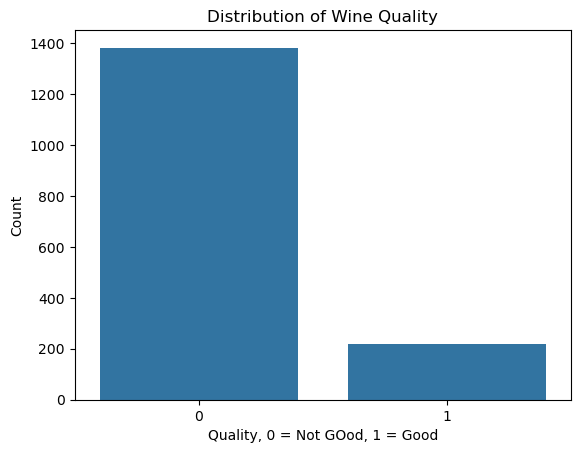

In [84]:
sns.countplot(x="quality_binary", data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality, 0 = Not GOod, 1 = Good")
plt.ylabel("Count")
plt.show()

### Task 3: Feature Scaling

- Feature scaling ensures that each feature contributes 'equally' to the result, preventing certain features with larger scales from dominating the learning process. 
- Standardization transforms features to have a mean of 0 and a standard deviation of 1, which is crucial for algorithms like **KNN** and **SVM**

In [85]:
# 1. Seperate features and target variable

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']


# 2. Use StandardScaler to standardize the feature data.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [86]:
# Compare data before and after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Before Scaling:\n", X['pH'].head(5))
print("After Scaling:\n", X_scaled_df['pH'].head(5))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64
After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
Name: pH, dtype: float64


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Task 5: Apply K-Nearest neighbors (KNN) classifier

1. Initialize a KNN classifier
2. Use cross-validation to find the optimal value of K (number of neighbors)
3. Train the mdoel with the optimal K
4. Make predictions on the test set.
5. Evaluate the model using accuracy score and confusing matrix


In [88]:
# 1. Initialize
knn = KNeighborsClassifier()

# 2. Cross-validify
## Paramter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

## Use GridSearchCV to find optimal K
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

## Get optimal K
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal K: {optimal_k}")

# 3. Train
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# 4. Predict
y_prediction = knn_optimal.predict(X_test)

# 5. Evaluate:
accuracy_knn = accuracy_score(y_test, y_prediction)
cm_knn = confusion_matrix(y_test, y_prediction)


print(f"Accuarcy for KNN: {accuracy_knn}")
## Closer to 1 = Bueno! 
print(f"Confusion Matrix for KNN: \n {cm_knn}")
## Format:
## [ TP, FP]
## [ FN, TN]


Optimal K: 4
Accuarcy for KNN: 0.88125
Confusion Matrix for KNN: 
 [[398  15]
 [ 42  25]]


### Task 6. Apply Support Vector Machine (***SVM***) Classifier

1. Initialize SVM Classifier with different kernels (linear, rbf)
2. Train the models on the training data
3. Make predictions on the test set
4. Evaluate the models using accuracy score and confusion matrix

In [89]:
# 1. Initialize
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# 2. Train
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train,y_train)

# 3. Predict
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)



accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)


print(f"Accuracy for Linear: {accuracy_linear}")
print(f"Confusion Matrix Linear: \n {cm_linear}")

print(f"Accuracy for RBF: {accuracy_rbf}")
print(f"Confusion Matrix rbf: \n {cm_rbf}")



Accuracy for Linear: 0.8604166666666667
Confusion Matrix Linear: 
 [[413   0]
 [ 67   0]]
Accuracy for RBF: 0.8833333333333333
Confusion Matrix rbf: 
 [[403  10]
 [ 46  21]]


### Task 7: Compare Performances of Classifiers

In [90]:
# Summary Table:
summary = {
  'Classifier' : ['KNN', 'SVM (Linear)', 'SVM (RBF)'],
  'Accuracy' : [accuracy_knn, accuracy_linear, accuracy_rbf]
}

summary_df = pd.DataFrame(summary)
summary_df.set_index('Classifier', inplace=True)


print(summary_df)


              Accuracy
Classifier            
KNN           0.881250
SVM (Linear)  0.860417
SVM (RBF)     0.883333


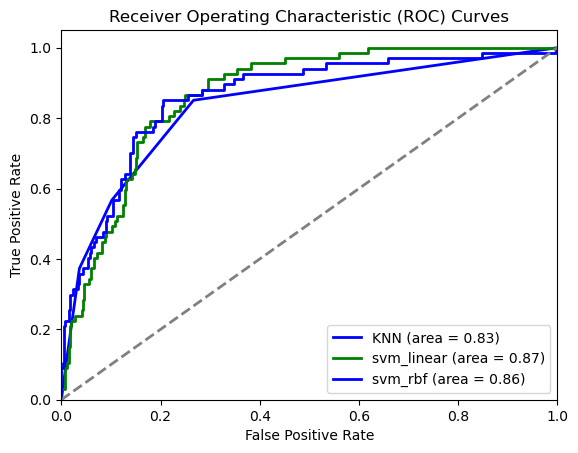

In [91]:
# Plot ROC Curves for Each classifier:

# Compute ROC curve and ROC area for each classifier
# fpr = false positive rate, tpr = true positive rate
# auc = area under curve
from sklearn.metrics import auc, roc_curve


# K Nearest Neighbor
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_optimal.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# SVM Linear 
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, svm_linear.decision_function(X_test))
roc_auc_linear = auc(fpr_svm_linear, tpr_svm_linear)

# SVM RBF
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, svm_rbf.decision_function(X_test))
roc_auc_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)


# Plot Curves:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='svm_linear (area = %0.2f)' % roc_auc_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='blue', lw=2, label='svm_rbf (area = %0.2f)' % roc_auc_rbf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()





### Reflection:
1. Which performed best based on accuracy:
  - SVM RBF

2. Considering both accuracy and confusion matrixes, which model would you choose and why? 
  - Probably still SVM RBF because it had both the best accuracy and a 'balanced' confusion matrix as opposed to SVM Linear. KNN also had balanced CM but slightly less accuracy.

3. Could you use the models trained on red wine to predict the quality of the different white wines?
  - Yes... but maybe not ideal. Might need to recalculate the features since different features may be more/less important for white wine.
  - Data distr. would also be different

4. Reflect on how you might apply the techniques learned in this lab to other datasets and machine learning problems
  - SVM could be used for:
    - Text classification:
      - e.g. Emails as spam or not
      - Using Linear kernel 
    - Image Classification: 
      - Handwritten digits
        - Use RBF to classify images based on pixel values or features using techniques like PCA

  - KNN could be used for:
    - recommendation systems
      - Recommending movies to users based on past ratings
      - Detecting fraudulent transactions in financial data
      - Diagnosing diseases based on patient symptoms and test results
